## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  92.291172  1347.742160  0.276685   1.538497  1.350857
1  97.101755  1299.075600  0.304670  10.761961  1.481338
2  53.634956  1586.231708  0.070021   6.993694  1.105131
3  79.325533  1456.461704  0.361517   5.752927  1.436014
4  73.177824   316.794403  0.882898   3.569970  1.338271


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.02),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 1.17578 | train_mse: 4.12301 | train_mae: 1.57121 |  0:00:00s
epoch 1  | loss: 1.09225 | train_mse: 3.61536 | train_mae: 1.41238 |  0:00:00s


epoch 2  | loss: 0.62538 | train_mse: 2.13366 | train_mae: 1.06503 |  0:00:00s
epoch 3  | loss: 0.67232 | train_mse: 1.44224 | train_mae: 0.90438 |  0:00:00s


epoch 4  | loss: 0.49224 | train_mse: 1.78282 | train_mae: 1.03583 |  0:00:00s
epoch 5  | loss: 0.39649 | train_mse: 1.52061 | train_mae: 1.02628 |  0:00:00s
epoch 6  | loss: 0.37764 | train_mse: 1.43887 | train_mae: 0.95143 |  0:00:00s


epoch 7  | loss: 0.29702 | train_mse: 1.24184 | train_mae: 0.86678 |  0:00:01s
epoch 8  | loss: 0.36477 | train_mse: 0.86391 | train_mae: 0.71187 |  0:00:01s
epoch 9  | loss: 0.32098 | train_mse: 0.9803  | train_mae: 0.72165 |  0:00:01s


epoch 10 | loss: 0.19344 | train_mse: 1.70329 | train_mae: 0.8892  |  0:00:01s
epoch 11 | loss: 0.27456 | train_mse: 1.97217 | train_mae: 0.97713 |  0:00:01s


epoch 12 | loss: 0.29194 | train_mse: 1.54868 | train_mae: 0.87877 |  0:00:01s
epoch 13 | loss: 0.238   | train_mse: 1.56566 | train_mae: 0.89947 |  0:00:01s
epoch 14 | loss: 0.32455 | train_mse: 1.03702 | train_mae: 0.74536 |  0:00:01s


epoch 15 | loss: 0.23488 | train_mse: 0.69147 | train_mae: 0.61106 |  0:00:01s
epoch 16 | loss: 0.2171  | train_mse: 0.67363 | train_mae: 0.60197 |  0:00:01s
epoch 17 | loss: 0.26582 | train_mse: 0.78244 | train_mae: 0.63399 |  0:00:02s


epoch 18 | loss: 0.16755 | train_mse: 0.65698 | train_mae: 0.58794 |  0:00:02s
epoch 19 | loss: 0.33866 | train_mse: 0.37326 | train_mae: 0.44223 |  0:00:02s
epoch 20 | loss: 0.15221 | train_mse: 0.23788 | train_mae: 0.38587 |  0:00:02s


epoch 21 | loss: 0.17644 | train_mse: 0.231   | train_mae: 0.37794 |  0:00:02s
epoch 22 | loss: 0.27865 | train_mse: 0.31129 | train_mae: 0.42833 |  0:00:02s


epoch 23 | loss: 0.12139 | train_mse: 0.28965 | train_mae: 0.41028 |  0:00:02s
epoch 24 | loss: 0.20948 | train_mse: 0.16596 | train_mae: 0.32656 |  0:00:02s
epoch 25 | loss: 0.14941 | train_mse: 0.13414 | train_mae: 0.293   |  0:00:02s


epoch 26 | loss: 0.14218 | train_mse: 0.12719 | train_mae: 0.27906 |  0:00:02s
epoch 27 | loss: 0.14957 | train_mse: 0.15335 | train_mae: 0.29216 |  0:00:03s
epoch 28 | loss: 0.14604 | train_mse: 0.15625 | train_mae: 0.31866 |  0:00:03s


epoch 29 | loss: 0.1865  | train_mse: 0.13795 | train_mae: 0.2996  |  0:00:03s
epoch 30 | loss: 0.10326 | train_mse: 0.11966 | train_mae: 0.27261 |  0:00:03s
epoch 31 | loss: 0.19917 | train_mse: 0.12548 | train_mae: 0.27381 |  0:00:03s


epoch 32 | loss: 0.12772 | train_mse: 0.11683 | train_mae: 0.27317 |  0:00:03s
epoch 33 | loss: 0.11744 | train_mse: 0.11005 | train_mae: 0.2643  |  0:00:03s
epoch 34 | loss: 0.14409 | train_mse: 0.1096  | train_mae: 0.26248 |  0:00:03s


epoch 35 | loss: 0.15234 | train_mse: 0.11942 | train_mae: 0.27752 |  0:00:03s
epoch 36 | loss: 0.20345 | train_mse: 0.09963 | train_mae: 0.2501  |  0:00:03s
epoch 37 | loss: 0.17056 | train_mse: 0.12177 | train_mae: 0.27994 |  0:00:03s


epoch 38 | loss: 0.1207  | train_mse: 0.11808 | train_mae: 0.26525 |  0:00:04s
epoch 39 | loss: 0.17991 | train_mse: 0.12887 | train_mae: 0.27536 |  0:00:04s
epoch 40 | loss: 0.15737 | train_mse: 0.14553 | train_mae: 0.298   |  0:00:04s


epoch 41 | loss: 0.1466  | train_mse: 0.11963 | train_mae: 0.27884 |  0:00:04s
epoch 42 | loss: 0.17433 | train_mse: 0.10048 | train_mae: 0.25878 |  0:00:04s


epoch 43 | loss: 0.10737 | train_mse: 0.10227 | train_mae: 0.25328 |  0:00:04s
epoch 44 | loss: 0.18676 | train_mse: 0.11977 | train_mae: 0.25958 |  0:00:04s


epoch 45 | loss: 0.17444 | train_mse: 0.1023  | train_mae: 0.24188 |  0:00:04s
epoch 46 | loss: 0.13013 | train_mse: 0.10635 | train_mae: 0.25234 |  0:00:04s
epoch 47 | loss: 0.1222  | train_mse: 0.10908 | train_mae: 0.25086 |  0:00:04s


epoch 48 | loss: 0.09652 | train_mse: 0.10549 | train_mae: 0.25461 |  0:00:05s
epoch 49 | loss: 0.14025 | train_mse: 0.08744 | train_mae: 0.23517 |  0:00:05s
epoch 50 | loss: 0.18723 | train_mse: 0.08975 | train_mae: 0.23702 |  0:00:05s


epoch 51 | loss: 0.13974 | train_mse: 0.13192 | train_mae: 0.28685 |  0:00:05s
epoch 52 | loss: 0.10313 | train_mse: 0.13023 | train_mae: 0.29099 |  0:00:05s


epoch 53 | loss: 0.12073 | train_mse: 0.10862 | train_mae: 0.26601 |  0:00:05s
epoch 54 | loss: 0.19505 | train_mse: 0.11735 | train_mae: 0.25837 |  0:00:05s
epoch 55 | loss: 0.32474 | train_mse: 0.09097 | train_mae: 0.23354 |  0:00:05s


epoch 56 | loss: 0.16021 | train_mse: 0.09698 | train_mae: 0.233   |  0:00:05s
epoch 57 | loss: 0.13199 | train_mse: 0.08403 | train_mae: 0.21534 |  0:00:05s
epoch 58 | loss: 0.09917 | train_mse: 0.07718 | train_mae: 0.21485 |  0:00:05s


epoch 59 | loss: 0.11908 | train_mse: 0.07205 | train_mae: 0.20311 |  0:00:06s
epoch 60 | loss: 0.12093 | train_mse: 0.07565 | train_mae: 0.2113  |  0:00:06s
epoch 61 | loss: 0.14451 | train_mse: 0.07693 | train_mae: 0.20489 |  0:00:06s


epoch 62 | loss: 0.10929 | train_mse: 0.08003 | train_mae: 0.21693 |  0:00:06s
epoch 63 | loss: 0.21931 | train_mse: 0.08497 | train_mae: 0.23108 |  0:00:06s


epoch 64 | loss: 0.18246 | train_mse: 0.08985 | train_mae: 0.23784 |  0:00:06s
epoch 65 | loss: 0.08484 | train_mse: 0.08092 | train_mae: 0.22519 |  0:00:06s
epoch 66 | loss: 0.10544 | train_mse: 0.07737 | train_mae: 0.21902 |  0:00:06s


epoch 67 | loss: 0.11376 | train_mse: 0.0723  | train_mae: 0.2103  |  0:00:06s
epoch 68 | loss: 0.12094 | train_mse: 0.07021 | train_mae: 0.21297 |  0:00:07s
epoch 69 | loss: 0.22436 | train_mse: 0.09463 | train_mae: 0.24249 |  0:00:07s


epoch 70 | loss: 0.14085 | train_mse: 0.08524 | train_mae: 0.23325 |  0:00:07s


epoch 71 | loss: 0.09399 | train_mse: 0.06879 | train_mae: 0.20847 |  0:00:07s
epoch 72 | loss: 0.23295 | train_mse: 0.07891 | train_mae: 0.21217 |  0:00:07s


epoch 73 | loss: 0.10172 | train_mse: 0.10806 | train_mae: 0.24497 |  0:00:07s
epoch 74 | loss: 0.07864 | train_mse: 0.11483 | train_mae: 0.25135 |  0:00:07s
epoch 75 | loss: 0.08074 | train_mse: 0.09694 | train_mae: 0.23624 |  0:00:07s


epoch 76 | loss: 0.1699  | train_mse: 0.09019 | train_mae: 0.23228 |  0:00:08s
epoch 77 | loss: 0.13122 | train_mse: 0.08829 | train_mae: 0.22745 |  0:00:08s
epoch 78 | loss: 0.0753  | train_mse: 0.10505 | train_mae: 0.24602 |  0:00:08s


epoch 79 | loss: 0.17574 | train_mse: 0.10206 | train_mae: 0.23988 |  0:00:08s
epoch 80 | loss: 0.11234 | train_mse: 0.10504 | train_mae: 0.24138 |  0:00:08s


epoch 81 | loss: 0.11194 | train_mse: 0.0947  | train_mae: 0.23186 |  0:00:08s
epoch 82 | loss: 0.24729 | train_mse: 0.07683 | train_mae: 0.21843 |  0:00:08s
epoch 83 | loss: 0.09292 | train_mse: 0.06718 | train_mae: 0.20335 |  0:00:08s


epoch 84 | loss: 0.13329 | train_mse: 0.06927 | train_mae: 0.20292 |  0:00:08s
epoch 85 | loss: 0.08765 | train_mse: 0.08229 | train_mae: 0.21853 |  0:00:08s
epoch 86 | loss: 0.09769 | train_mse: 0.10462 | train_mae: 0.24414 |  0:00:08s


epoch 87 | loss: 0.06802 | train_mse: 0.1199  | train_mae: 0.26118 |  0:00:08s
epoch 88 | loss: 0.14934 | train_mse: 0.09542 | train_mae: 0.22909 |  0:00:09s
epoch 89 | loss: 0.25476 | train_mse: 0.09349 | train_mae: 0.22979 |  0:00:09s


epoch 90 | loss: 0.13977 | train_mse: 0.06792 | train_mae: 0.19951 |  0:00:09s
epoch 91 | loss: 0.16449 | train_mse: 0.06314 | train_mae: 0.19509 |  0:00:09s


epoch 92 | loss: 0.1041  | train_mse: 0.07444 | train_mae: 0.20789 |  0:00:09s
epoch 93 | loss: 0.14125 | train_mse: 0.08449 | train_mae: 0.22253 |  0:00:09s
epoch 94 | loss: 0.15205 | train_mse: 0.09263 | train_mae: 0.23507 |  0:00:09s


epoch 95 | loss: 0.09887 | train_mse: 0.10116 | train_mae: 0.24788 |  0:00:09s
epoch 96 | loss: 0.16924 | train_mse: 0.11072 | train_mae: 0.25849 |  0:00:09s
epoch 97 | loss: 0.1198  | train_mse: 0.08451 | train_mae: 0.23542 |  0:00:09s


epoch 98 | loss: 0.1351  | train_mse: 0.06845 | train_mae: 0.21409 |  0:00:09s
epoch 99 | loss: 0.09276 | train_mse: 0.0661  | train_mae: 0.20623 |  0:00:10s
epoch 100| loss: 0.12641 | train_mse: 0.06315 | train_mae: 0.19825 |  0:00:10s


epoch 101| loss: 0.09765 | train_mse: 0.06071 | train_mae: 0.18946 |  0:00:10s
epoch 102| loss: 0.23543 | train_mse: 0.05741 | train_mae: 0.18303 |  0:00:10s
epoch 103| loss: 0.15941 | train_mse: 0.08218 | train_mae: 0.2203  |  0:00:10s


epoch 104| loss: 0.10456 | train_mse: 0.1126  | train_mae: 0.24896 |  0:00:10s
epoch 105| loss: 0.17265 | train_mse: 0.09861 | train_mae: 0.23043 |  0:00:10s
epoch 106| loss: 0.1145  | train_mse: 0.09018 | train_mae: 0.22602 |  0:00:10s


epoch 107| loss: 0.08192 | train_mse: 0.06923 | train_mae: 0.2004  |  0:00:10s
epoch 108| loss: 0.10048 | train_mse: 0.05827 | train_mae: 0.18482 |  0:00:10s
epoch 109| loss: 0.13008 | train_mse: 0.05542 | train_mae: 0.18413 |  0:00:10s


epoch 110| loss: 0.14239 | train_mse: 0.06586 | train_mae: 0.19808 |  0:00:11s
epoch 111| loss: 0.08232 | train_mse: 0.08868 | train_mae: 0.22774 |  0:00:11s
epoch 112| loss: 0.21041 | train_mse: 0.09505 | train_mae: 0.23287 |  0:00:11s


epoch 113| loss: 0.081   | train_mse: 0.09003 | train_mae: 0.22692 |  0:00:11s
epoch 114| loss: 0.10471 | train_mse: 0.08535 | train_mae: 0.22233 |  0:00:11s


epoch 115| loss: 0.10876 | train_mse: 0.07469 | train_mae: 0.20953 |  0:00:11s
epoch 116| loss: 0.0923  | train_mse: 0.07818 | train_mae: 0.21425 |  0:00:11s


epoch 117| loss: 0.08472 | train_mse: 0.10081 | train_mae: 0.23386 |  0:00:11s
epoch 118| loss: 0.08529 | train_mse: 0.13965 | train_mae: 0.26628 |  0:00:11s
epoch 119| loss: 0.07442 | train_mse: 0.15785 | train_mae: 0.28362 |  0:00:11s


epoch 120| loss: 0.16911 | train_mse: 0.13237 | train_mae: 0.265   |  0:00:12s
epoch 121| loss: 0.11214 | train_mse: 0.13224 | train_mae: 0.26482 |  0:00:12s


epoch 122| loss: 0.11515 | train_mse: 0.11695 | train_mae: 0.25103 |  0:00:12s
epoch 123| loss: 0.11063 | train_mse: 0.10286 | train_mae: 0.23376 |  0:00:12s


epoch 124| loss: 0.16963 | train_mse: 0.09316 | train_mae: 0.22005 |  0:00:12s
epoch 125| loss: 0.12874 | train_mse: 0.09118 | train_mae: 0.20974 |  0:00:12s
epoch 126| loss: 0.09753 | train_mse: 0.10742 | train_mae: 0.22617 |  0:00:12s


epoch 127| loss: 0.14269 | train_mse: 0.10082 | train_mae: 0.22342 |  0:00:12s
epoch 128| loss: 0.10765 | train_mse: 0.09052 | train_mae: 0.219   |  0:00:12s
epoch 129| loss: 0.09721 | train_mse: 0.08844 | train_mae: 0.22233 |  0:00:12s


epoch 130| loss: 0.08994 | train_mse: 0.10096 | train_mae: 0.23987 |  0:00:12s
epoch 131| loss: 0.09507 | train_mse: 0.08537 | train_mae: 0.22253 |  0:00:13s
epoch 132| loss: 0.16659 | train_mse: 0.06798 | train_mae: 0.19784 |  0:00:13s


epoch 133| loss: 0.06875 | train_mse: 0.1338  | train_mae: 0.26292 |  0:00:13s
epoch 134| loss: 0.1122  | train_mse: 0.13288 | train_mae: 0.26937 |  0:00:13s


epoch 135| loss: 0.10546 | train_mse: 0.09462 | train_mae: 0.2316  |  0:00:13s
epoch 136| loss: 0.13743 | train_mse: 0.0581  | train_mae: 0.18842 |  0:00:13s
epoch 137| loss: 0.1192  | train_mse: 0.08793 | train_mae: 0.22775 |  0:00:13s


epoch 138| loss: 0.19997 | train_mse: 0.11092 | train_mae: 0.26026 |  0:00:13s
epoch 139| loss: 0.12937 | train_mse: 0.10696 | train_mae: 0.25375 |  0:00:13s
epoch 140| loss: 0.08982 | train_mse: 0.09871 | train_mae: 0.2352  |  0:00:13s


epoch 141| loss: 0.09549 | train_mse: 0.10258 | train_mae: 0.23292 |  0:00:13s
epoch 142| loss: 0.17916 | train_mse: 0.11194 | train_mae: 0.25086 |  0:00:14s
epoch 143| loss: 0.08619 | train_mse: 0.09668 | train_mae: 0.24528 |  0:00:14s


epoch 144| loss: 0.11924 | train_mse: 0.11492 | train_mae: 0.27702 |  0:00:14s
epoch 145| loss: 0.09028 | train_mse: 0.07158 | train_mae: 0.2257  |  0:00:14s


epoch 146| loss: 0.06814 | train_mse: 0.06463 | train_mae: 0.20476 |  0:00:14s
epoch 147| loss: 0.09019 | train_mse: 0.05857 | train_mae: 0.1928  |  0:00:14s
epoch 148| loss: 0.08466 | train_mse: 0.05922 | train_mae: 0.19508 |  0:00:14s


epoch 149| loss: 0.09002 | train_mse: 0.05471 | train_mae: 0.18647 |  0:00:14s
epoch 150| loss: 0.11788 | train_mse: 0.0588  | train_mae: 0.19627 |  0:00:14s
epoch 151| loss: 0.08171 | train_mse: 0.05698 | train_mae: 0.19013 |  0:00:14s


epoch 152| loss: 0.09012 | train_mse: 0.08336 | train_mae: 0.22342 |  0:00:14s

Early stopping occurred at epoch 152 with best_epoch = 102 and best_train_mae = 0.18303
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

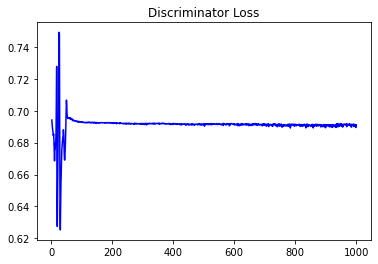

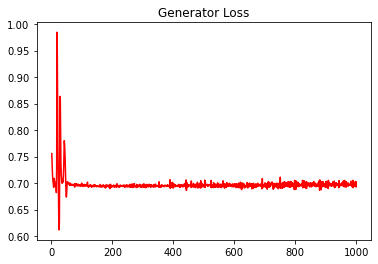

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.3223913049219344


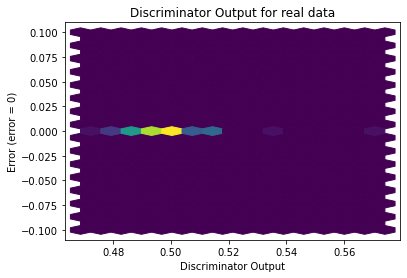

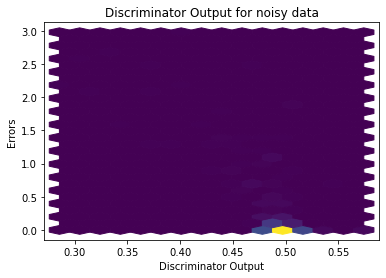

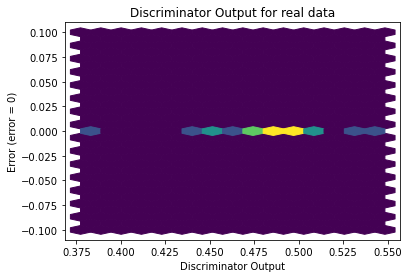

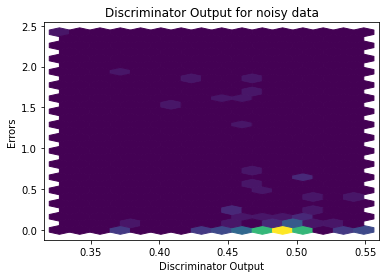

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


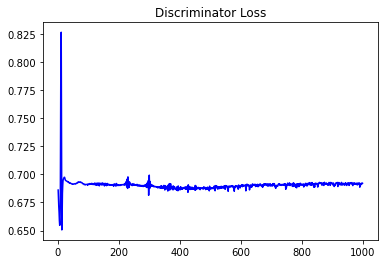

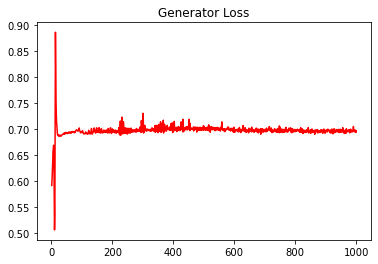

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.4005322511621014


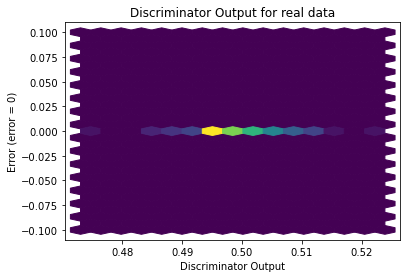

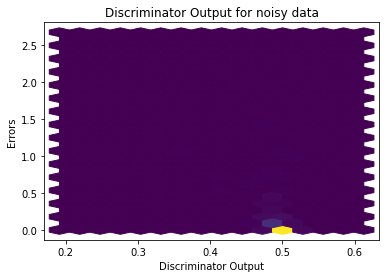

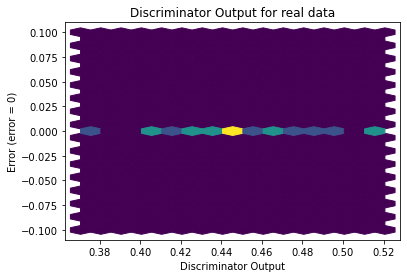

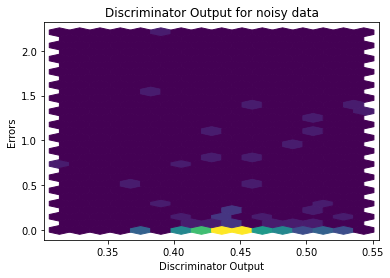

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1912]], requires_grad=True)
